In [1]:
# reload automatically the modules when they change
%load_ext autoreload
%autoreload 2

# add the current directory to the python search path
import sys
sys.path.insert(0, ".")
sys.path.insert(0, "./src/")

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from scipy import signal
from scipy.optimize import differential_evolution

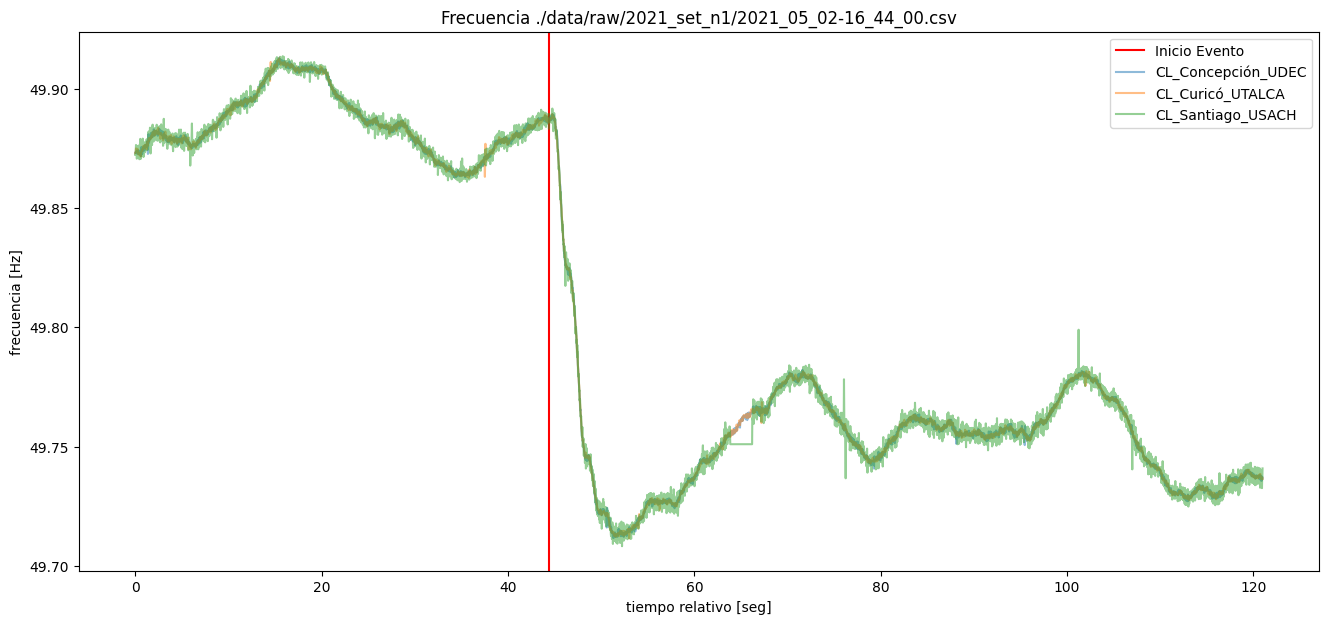

In [4]:
## Ejemplo uso plot_raw
from plot_raw import plot_raw

input_path = "./data/raw/2021_set_n1/2021_05_02-16_44_00.csv"
fig = plot_raw(input_path)



- - - - - - - - - - - - - - - - - - - - - -
 message: Optimization terminated successfully.
 success: True
     fun: 0.005160995859880187
       x: [ 9.949e+02  4.261e+00  4.193e+00  3.992e+02  8.239e-01
            3.325e-01]
     nit: 449
    nfev: 40605
     jac: [-3.417e-07  1.575e-05 -2.054e-06  4.825e-07  2.112e-05
           -2.236e-05]
model = c
Ts = 0.3
event_time = 25

tol = 0.01
popsize = 15
mutation = 0.75
recombination = 0.7


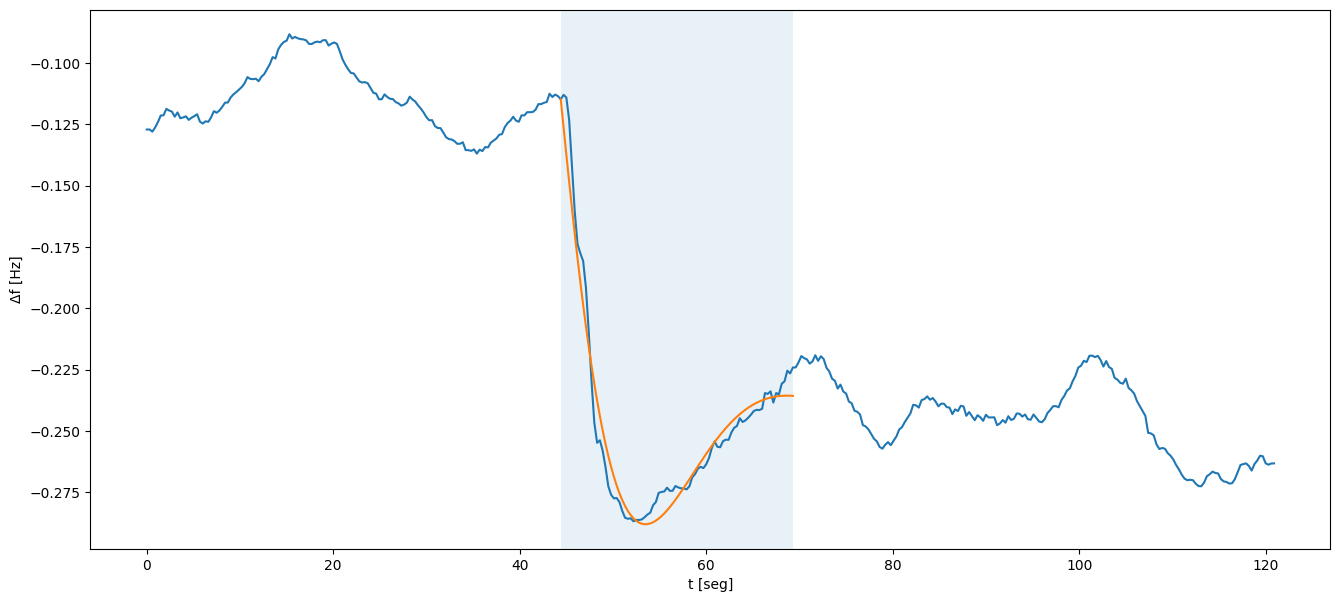



- - - - - - - - - - - - - - - - - - - - - -
 message: Optimization terminated successfully.
 success: True
     fun: 0.005682123209072224
       x: [ 3.259e+00  9.699e+02  8.878e+02  1.630e+02  7.698e-01
            5.038e-01]
     nit: 366
    nfev: 33121
     jac: [ 8.216e-07  5.136e-07 -6.706e-07  4.463e-07 -1.820e-06
            9.714e-09]
model = c
Ts = 0.3
event_time = 30

tol = 0.01
popsize = 15
mutation = 0.75
recombination = 0.7


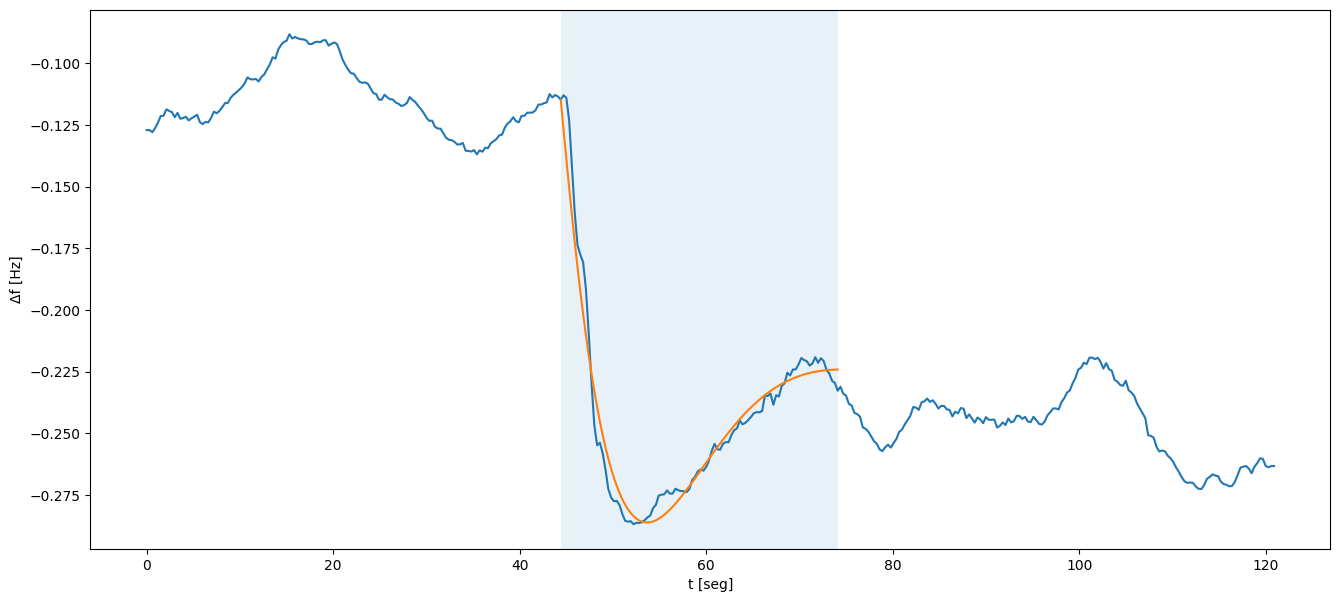



- - - - - - - - - - - - - - - - - - - - - -
 message: Optimization terminated successfully.
 success: True
     fun: 0.014108511654833176
       x: [ 2.050e+00  5.829e+01  5.971e+02  1.223e+02  1.416e+00
            2.388e+00]
     nit: 247
    nfev: 22376
     jac: [ 2.548e-05  4.583e-07  2.149e-07 -2.013e-06  4.851e-06
            1.679e-05]
model = c
Ts = 0.3
event_time = 35

tol = 0.01
popsize = 15
mutation = 0.75
recombination = 0.7


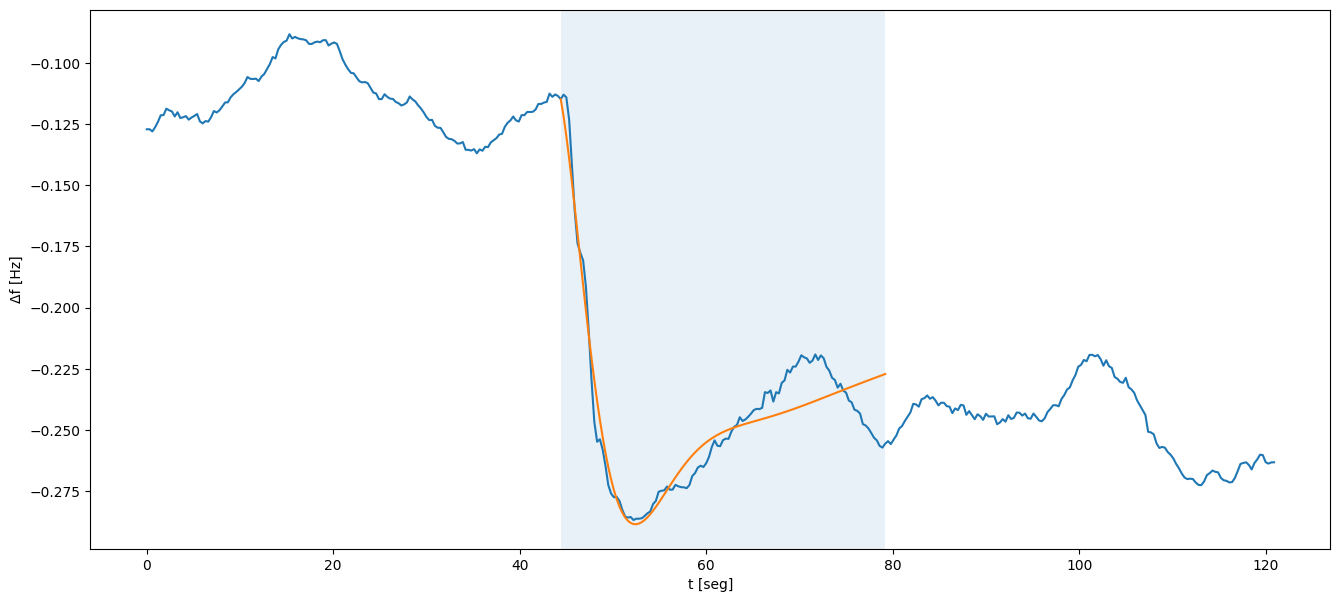



- - - - - - - - - - - - - - - - - - - - - -
 message: Optimization terminated successfully.
 success: True
     fun: 0.2992904379945276
       x: [ 6.995e+02  2.278e+01  6.584e+02  5.630e+02  2.507e+00
            5.689e+00]
     nit: 57
    nfev: 5255
     jac: [-6.994e-07  4.330e-06  3.747e-06 -5.174e-06  1.532e-06
            1.860e-06]
model = c
Ts = 0.3
event_time = 40

tol = 0.01
popsize = 15
mutation = 0.75
recombination = 0.7


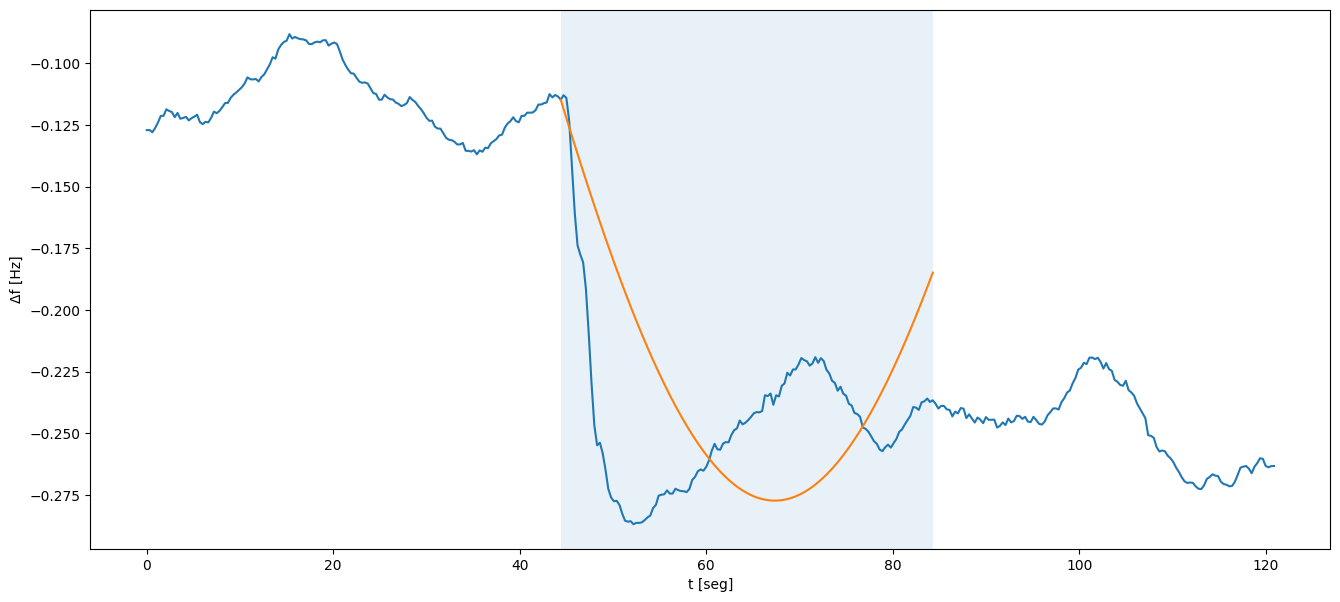



- - - - - - - - - - - - - - - - - - - - - -
 message: Optimization terminated successfully.
 success: True
     fun: 0.010072985243914076
       x: [ 3.306e+00  9.503e+02  9.825e+02  3.175e+02  8.240e-01
            4.595e-01]
     nit: 358
    nfev: 32373
     jac: [-1.154e-04  3.060e-07 -6.776e-07  1.006e-06 -3.488e-05
            7.217e-05]
model = c
Ts = 0.3
event_time = 45

tol = 0.01
popsize = 15
mutation = 0.75
recombination = 0.7


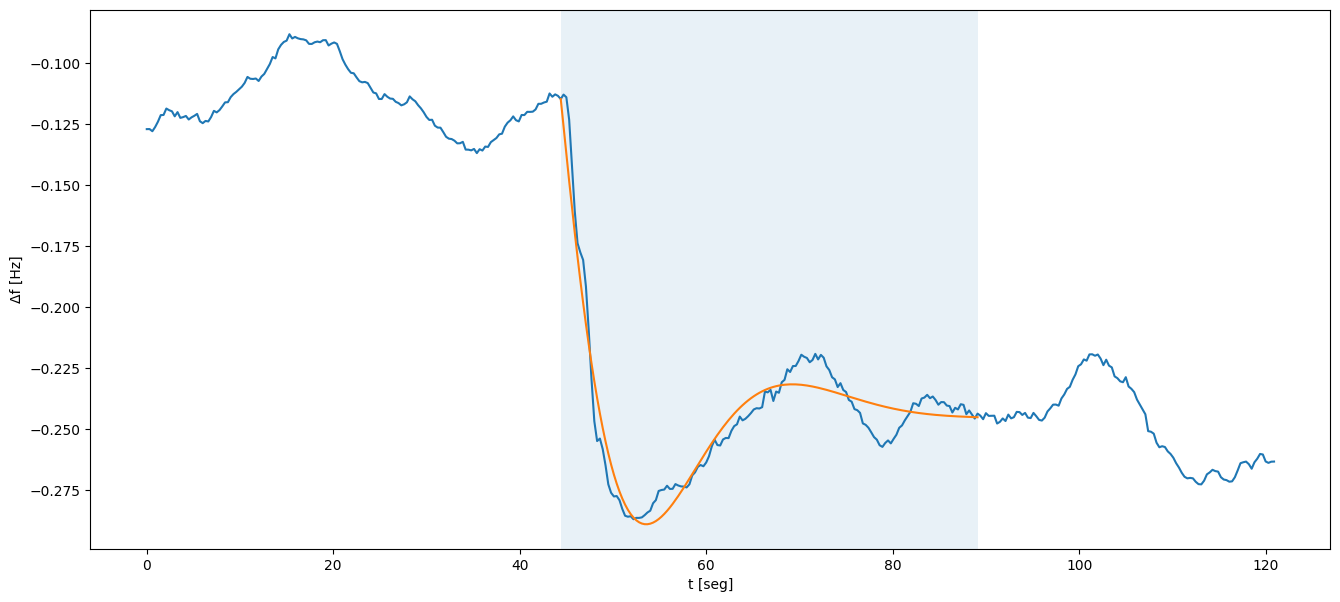



- - - - - - - - - - - - - - - - - - - - - -
 message: Optimization terminated successfully.
 success: True
     fun: 0.010061096160318077
       x: [ 9.382e+02  4.751e+00  4.230e+00  2.626e+02  8.353e-01
            4.734e-01]
     nit: 354
    nfev: 32020
     jac: [-8.150e-07  1.797e-05 -1.857e-04  2.274e-06  1.843e-05
            2.775e-04]
model = c
Ts = 0.3
event_time = 50

tol = 0.01
popsize = 15
mutation = 0.75
recombination = 0.7


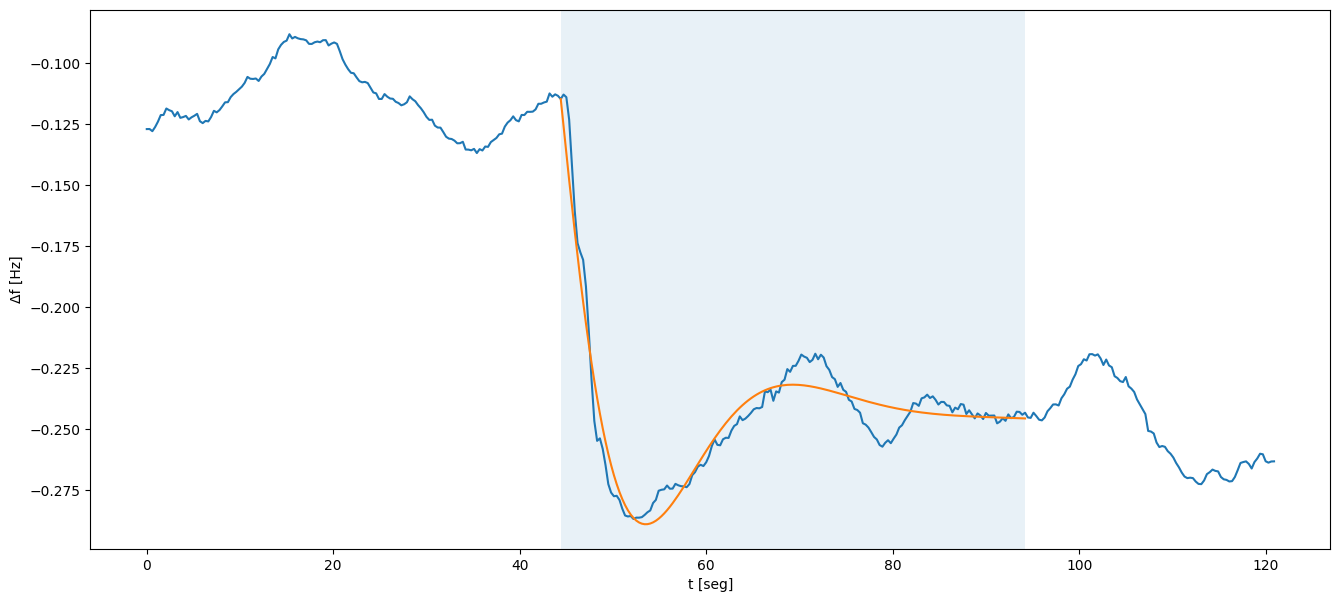

In [5]:
## EJemplo uso sampler de_runs y plot_result
from sampler import sampler
from de_run import objective_function
from plot_result import plot_result

import models as mdl

model = "c"
Ts = 0.3

for k in range(6):
    event_time = 25 + 5*k
    df = sampler(input_path, Ts, event_time=event_time)
    P0 = df["power"][0] / 1000 # esto en realidad es ΔP_k en la notacion del modelo: que unidades tiene??

    event_freq = df["delta_freq"][df["event"]==1].to_numpy()

    bounds = [(0.00001, 1000) for i in range(mdl.params[model])] ## CHECK THIS SOLUTION
    arguments = (model, Ts, P0, event_freq)

    # DE Default parameters
    popsize = 15
    mutation = 0.75  # can be interval (min, max), will change at each iteration. 
    recombination = 0.7
    tol = 0.01

    result = differential_evolution(
        objective_function, 
        bounds, 
        args = (arguments,), 
    #    callback = callback,
        popsize = popsize, 
        tol = tol, 
        mutation = mutation, 
        recombination = recombination
    )

    print("\n\n- - - - - - - - - - - - - - - - - - - - - -")
    print(result)
    print(f"model = {model}\nTs = {Ts}\nevent_time = {event_time}\n\ntol = {tol}\npopsize = {popsize}\nmutation = {mutation}\nrecombination = {recombination}")
    fig = plot_result(df, arguments, result.x)
    plt.show(fig)




- - - - - - - - - - - - - - - - - - - - - -
 message: Optimization terminated successfully.
 success: True
     fun: 0.010676615926532955
       x: [ 6.580e+02  4.142e+00  2.012e+02  7.270e-01  4.442e-01]
     nit: 170
    nfev: 12915
     jac: [-4.982e-07  1.301e-07  1.106e-06 -2.338e-07 -1.577e-06]
model = b
Ts = 0.3
event_time = 45

tol = 0.01
popsize = 15
mutation = 0.75
recombination = 0.7


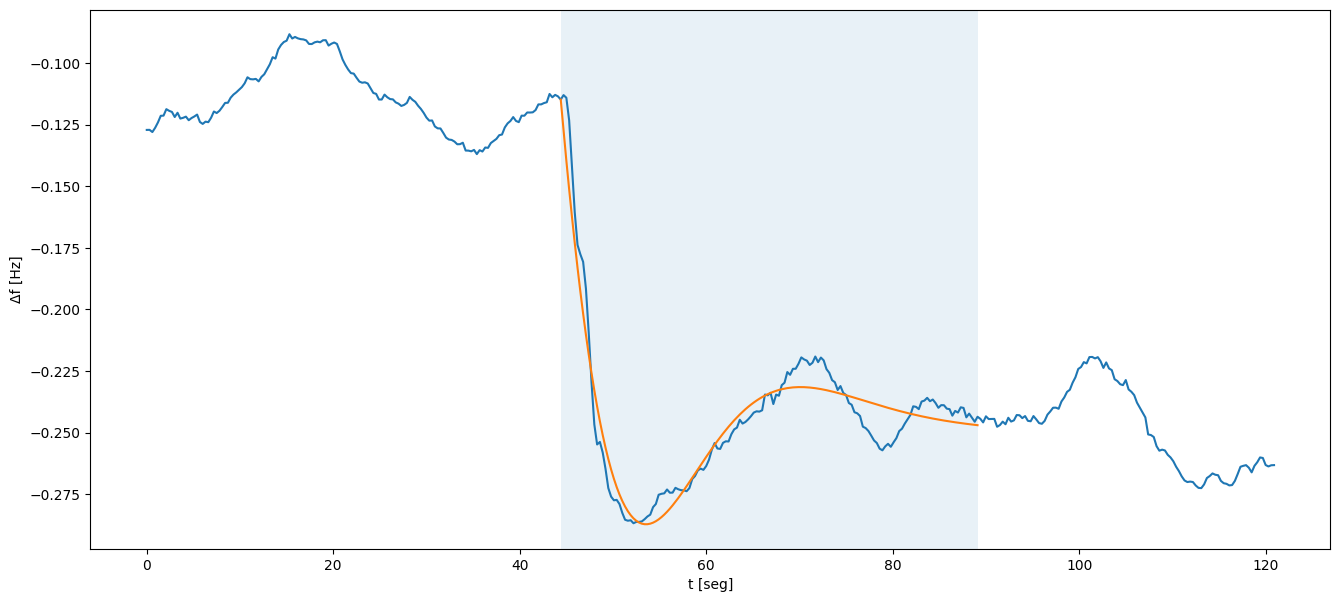



- - - - - - - - - - - - - - - - - - - - - -
 message: Optimization terminated successfully.
 success: True
     fun: 0.010040974470411801
       x: [ 9.644e+02  4.176e+00  4.238e+00  2.832e+02  8.225e-01
            4.539e-01]
     nit: 359
    nfev: 32540
     jac: [-9.211e-08 -6.043e-05 -2.256e-05  2.214e-07  2.245e-07
           -9.590e-05]
model = c
Ts = 0.3
event_time = 45

tol = 0.01
popsize = 15
mutation = 0.75
recombination = 0.7


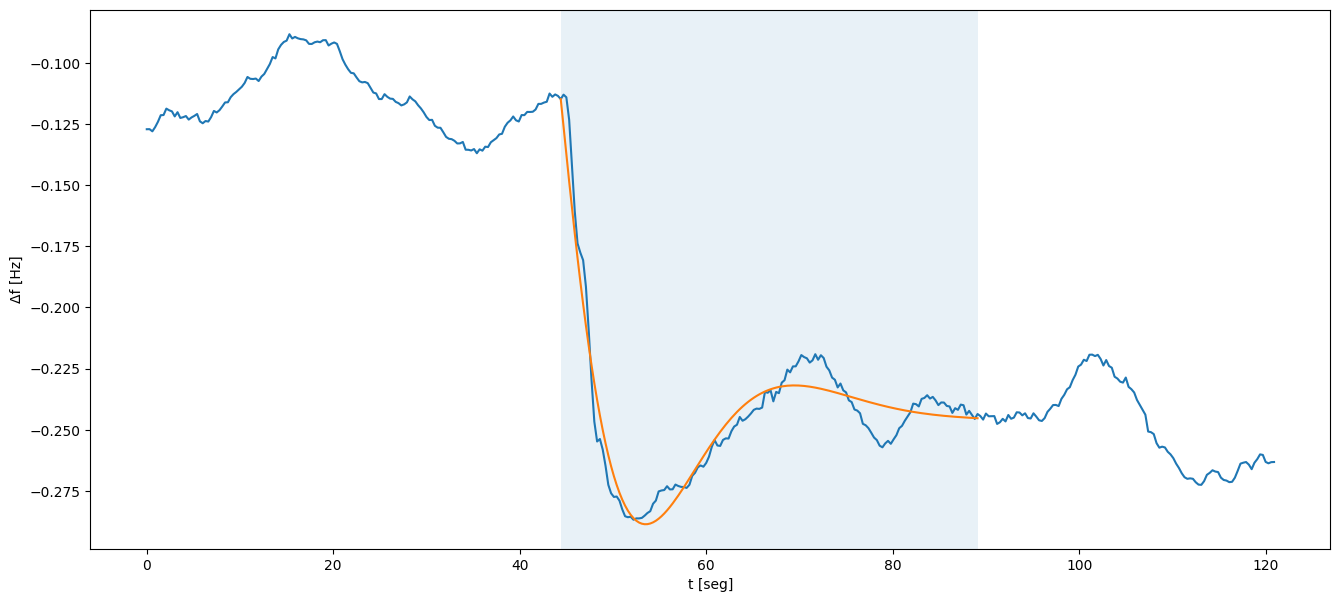



- - - - - - - - - - - - - - - - - - - - - -
 message: Optimization terminated successfully.
 success: True
     fun: 0.03426206498216032
       x: [ 4.136e+02  6.185e+02  1.184e+02  7.448e-01  1.310e+00]
     nit: 121
    nfev: 9192
     jac: [ 1.134e-06 -5.690e-07  1.222e-05 -3.747e-08  2.082e-08]
model = cc
Ts = 0.3
event_time = 45

tol = 0.01
popsize = 15
mutation = 0.75
recombination = 0.7


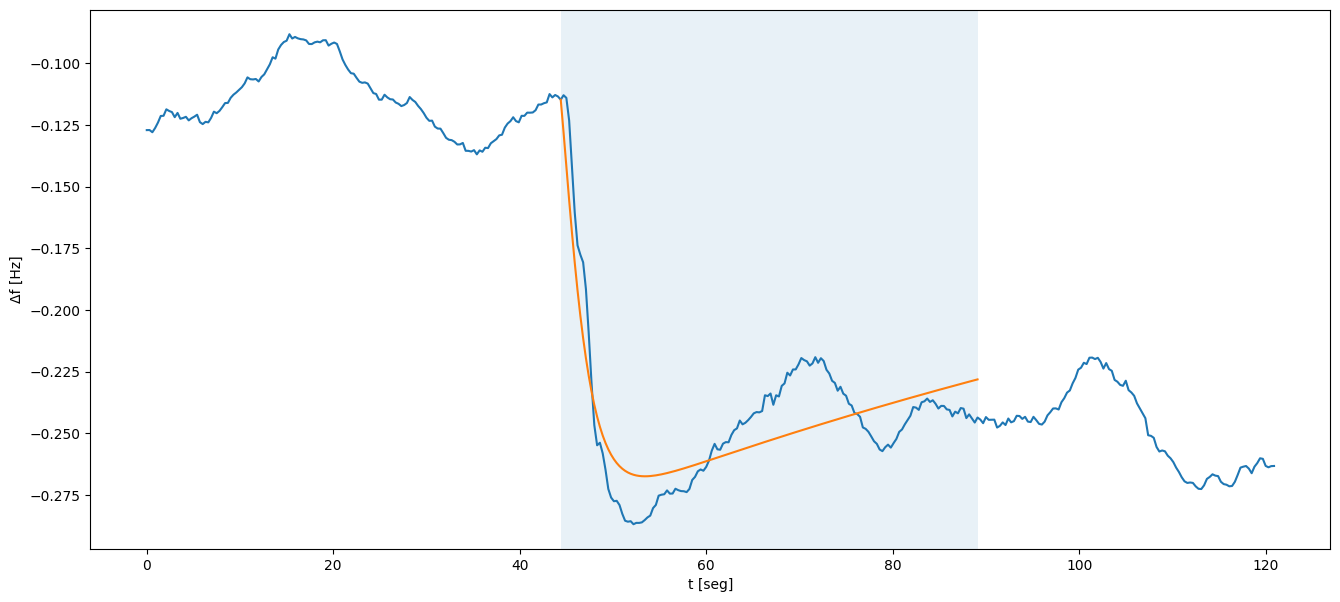

In [7]:
Ts = 0.3

for model in ["b","c","cc"]:
    event_time = 45
    df = sampler(input_path, Ts, event_time=event_time)
    P0 = df["power"][0] / 1000 # esto en realidad es ΔP_k en la notacion del modelo: que unidades tiene??

    event_freq = df["delta_freq"][df["event"]==1].to_numpy()

    bounds = [(0.00001, 1000) for i in range(mdl.params[model])] ## CHECK THIS SOLUTION
    arguments = (model, Ts, P0, event_freq)

    # DE Default parameters
    popsize = 15
    mutation = 0.75  # can be interval (min, max), will change at each iteration. 
    recombination = 0.7
    tol = 0.01

    result = differential_evolution(
        objective_function, 
        bounds, 
        args = (arguments,), 
    #    callback = callback,
        popsize = popsize, 
        tol = tol, 
        mutation = mutation, 
        recombination = recombination
    )

    print("\n\n- - - - - - - - - - - - - - - - - - - - - -")
    print(result)
    print(f"model = {model}\nTs = {Ts}\nevent_time = {event_time}\n\ntol = {tol}\npopsize = {popsize}\nmutation = {mutation}\nrecombination = {recombination}")
    fig = plot_result(df, arguments, result.x)
    plt.show(fig)


---

$ $  
$ $  
$ $  
$ $  
$ $  
$ $  
$ $  
$ $  
$ $  
$ $  
$ $  
$ $  
$ $  
$ $  
$ $    
$ $  
$ $  
$ $  
$ $  
$ $  
$ $  
$ $  

---

In [13]:
## EJemplo uso scipy.optimize.differential_evolution y plot_result
from sampler import sampler
from scipy.optimize import differential_evolution
from objective_function import objective_function

#input_path = "./data/raw/2021_set_n1/2021_05_02-16_44_00.csv"
input_path = "./data/raw/2021_set_n1/2021_06_19-09_04_00.csv"

model = "c"
Ts = 0.3
df = sampler(input_path, Ts, event_time=25)
P0 = df["power"][0] / 1000


event_freq = df["freq"][df["event"]==1].to_numpy()

bounds = [(0.00001, 1000) for i in range(6)]
arguments = (model, Ts, P0, event_freq)

obj_fun_vavues = []
best_x_iterk = []
conv_prop_iterk = []
def callback(xk, convergence):
    obj_fun_vavues.append(objective_function(xk, arguments))
    best_x_iterk.append(xk)
    conv_prop_iterk.append(convergence)

tol = 0.01
popsize = 30
mutation = (0.5, 1.5)
recombination = 0.6

result = differential_evolution(
    objective_function, 
    bounds, 
    args = (arguments,), 
    callback = callback,
    popsize = popsize, 
    tol = tol, 
    mutation = mutation, 
    recombination = recombination
)

result

ModuleNotFoundError: No module named 'objective_function'

Text(50, 0.5, 'model = 1\nTs = 0.3\n\ntol = 0.01\npopsize = 30\nmutation = (0.5, 1.5)\nrecombination = 0.6')

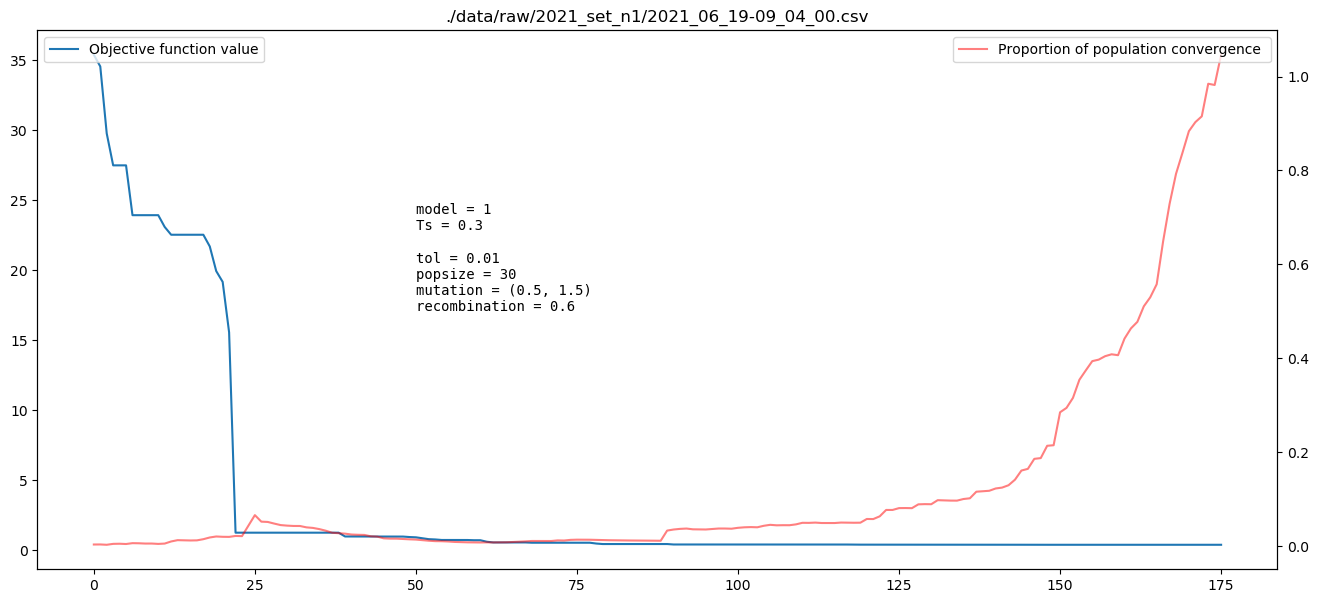

In [76]:
fig_size = (16, 7)
fig, ax1 = plt.subplots(figsize=fig_size)

ax1.plot(obj_fun_vavues, label = "Objective function value")
ax2 = ax1.twinx()
ax2.plot(conv_prop_iterk, color = 'red', alpha = .5, label = "Proportion of population convergence ")
ax1.legend(loc =  'upper left')
ax2.legend(loc = 'upper right')
plt.title(input_path)
ax2.text(50, .5, f"model = {model}\nTs = {Ts}\n\ntol = {tol}\npopsize = {popsize}\nmutation = {mutation}\nrecombination = {recombination}", fontsize=10, fontfamily='monospace' )


Text(0.5, 1.0, './data/raw/2021_set_n1/2021_06_19-09_04_00.csv')

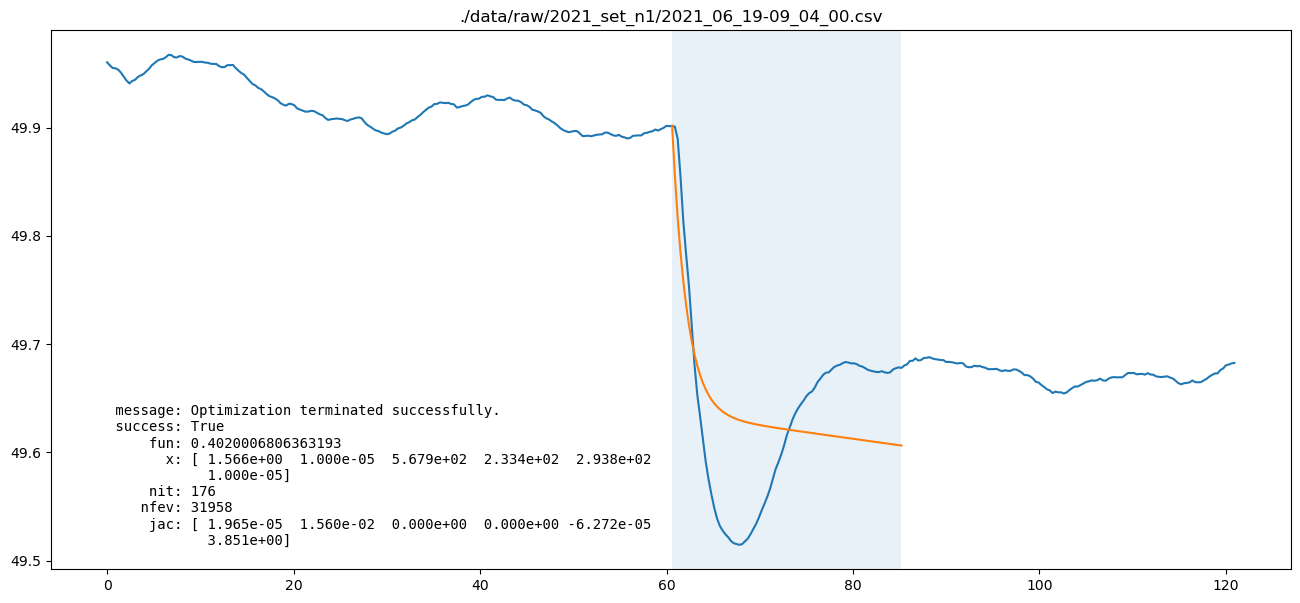

In [65]:
from plot_result import plot_result
fig = plot_result(df, arguments, result.x)
plt.text(0, min(event_freq), repr(result), fontsize=10, fontfamily='monospace' )
plt.title(input_path)

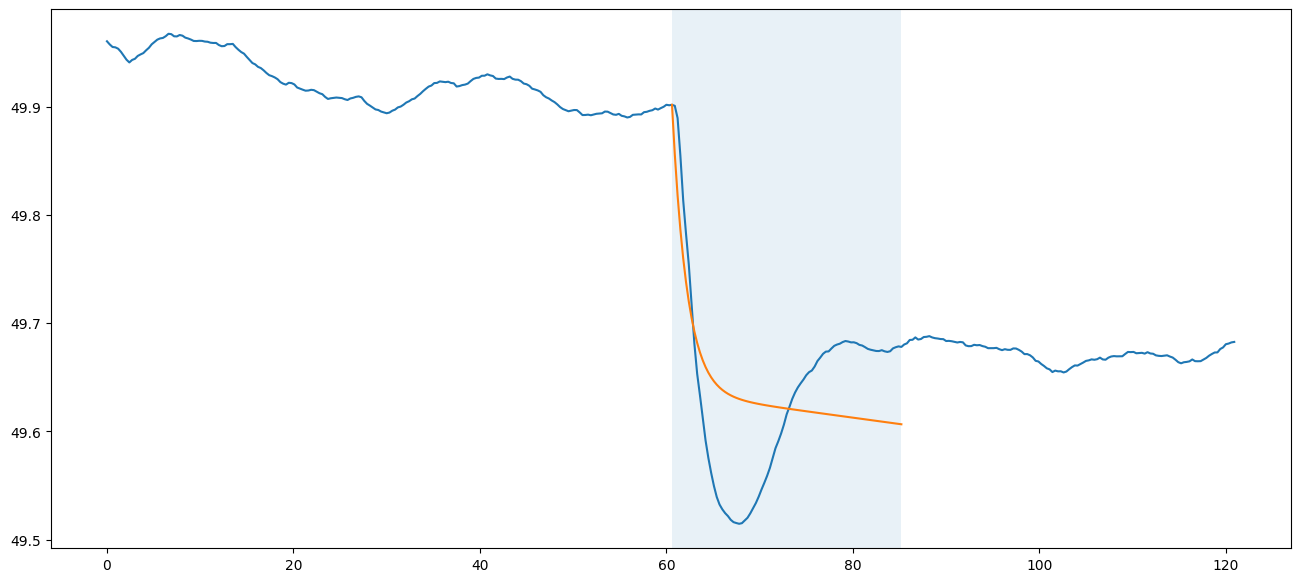

In [6]:
from objective_function import modelo_c

fig_size = (16, 7)
sys = modelo_c(result.x, Ts)
        
sim_power = P0 * np.repeat(1, event_freq.shape)
sim = signal.dlsim(sys, sim_power, x0 = event_freq[0])
sim_freq = sim[1].ravel()
    
real_time = df["time"].to_numpy()
real_freq = df["freq"].to_numpy()
event_time = df["time"][df["event"]==1].to_numpy()
sim_time = np.arange(event_time[0],event_time[-1],Ts)

fig = plt.figure(figsize=fig_size)
    
plt.plot(real_time,real_freq)
plt.axvspan(event_time.min(),event_time.max(), alpha=.1)
plt.plot(sim_time,sim[1])

In [9]:
sim_time.size

83

In [10]:
# Ejemplo uso objective_function
from src.objective_function import objective_function

Kd = 1.479
K = 5.105
Ta = 0.0001
Tb = 0.0001
Tc = 7.652
Td = 1.977
params = [Ta,Tb,Tc,Td,K,Kd]

model = "c"
Ts = 0.1

input_path = "./data/test/2023_02_13-14_08_10_Sampling_100ms.csv"
df = pd.read_csv(input_path)
event_freq = df["Frecuencia [Hz]"][df["Evento"]==1].to_numpy()

P0 = df["Potencia [MW]"][0]/1000

args = (model, Ts, P0, event_freq)

objective_function(params, args)

428159.742116734


428159.742116734